#Detection and Monitoring of Buried Plastic in Sandy Environments Using Deep Learning and Computer Vision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading Datasets
**Step 1:** Data Collection and Annotation

In [ ]:
!unzip "/content/drive/MyDrive/Mini_Project/archive.zip" -d "/content/Aqua Trash/"

Archive:  /content/drive/MyDrive/Mini_Project/archive.zip
  inflating: /content/Aqua Trash/Images/000000_JPG.rf.d3371cb3d63a59c5ba6730368b7905af.jpg  
  inflating: /content/Aqua Trash/Images/000000_jpg.rf.beffaf3b548106ccf1da5dc629bc9504.jpg  
  inflating: /content/Aqua Trash/Images/000000_jpg.rf.e662cb85f63817325956fea222d0990f.jpg  
  inflating: /content/Aqua Trash/Images/000000_jpg.rf.ee75fdf06813399a8376c6ff7056423a.jpg  
  inflating: /content/Aqua Trash/Images/000001_JPG.rf.ccfdd243a78a6cfa119be0349d18c0ed.jpg  
  inflating: /content/Aqua Trash/Images/000001_jpg.rf.3b10b06a0479e6c9e52202033c95d203.jpg  
  inflating: /content/Aqua Trash/Images/000001_jpg.rf.42c4ba88119aae9d425f5c004cb2ce0d.jpg  
  inflating: /content/Aqua Trash/Images/000001_jpg.rf.a23b83dbda863601c92725ae9ba3bab7.jpg  
  inflating: /content/Aqua Trash/Images/000002_jpg.rf.ba12a4ce95a3dd81818a5e373efe28be.jpg  
  inflating: /content/Aqua Trash/Images/000002_jpg.rf.cc63f3f198e4bafa011b425d63252066.jpg  
  inflating:

In [ ]:
!unzip "/content/drive/MyDrive/Mini_Project/Garbage Detection.v1i.yolov8.zip" -d "/content/Trash Data yolo/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455b12b36b_jpg.rf.2fe3a3cd5bc1584f2a0ba29a008173ea.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455b12b36b_jpg.rf.389265263489ae367b84f66abe6ec684.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455b12b36b_jpg.rf.ab66a4f25a376df76ca39ddd7a67f503.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455eccc_jpg.rf.1f2a1cbd749ab36a64f76a53282f3ceb.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455eccc_jpg.rf.4ef41ca19fdf1fb3a320f33dedd1e579.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455eccc_jpg.rf.6c6b32acb9446230cb76332a9f345baa.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_45d1ca1_jpg.rf.3baee7dfd3e51bf399b23f8a6df5ac6f.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_45d1ca1_jpg.rf.8d025405a05151620bd1df25578eb9bc.txt  
 extracting: /conten

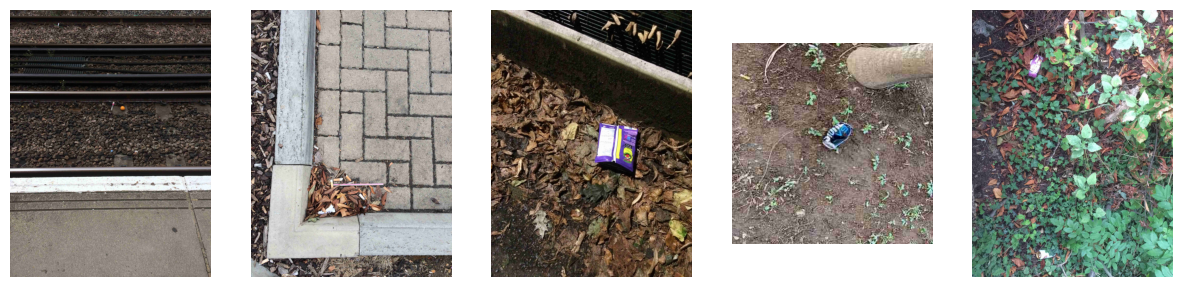

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder containing the images
image_folder = '/content/Aqua Trash/Images'

all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

selected_images = random.sample(image_files, min(5, len(image_files)))

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [ ]:
# Define the folder containing the images
image_folder = '/content/Trash Data yolo/train'

all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

selected_images = random.sample(image_files, min(5, len(image_files)))

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x500 with 0 Axes>

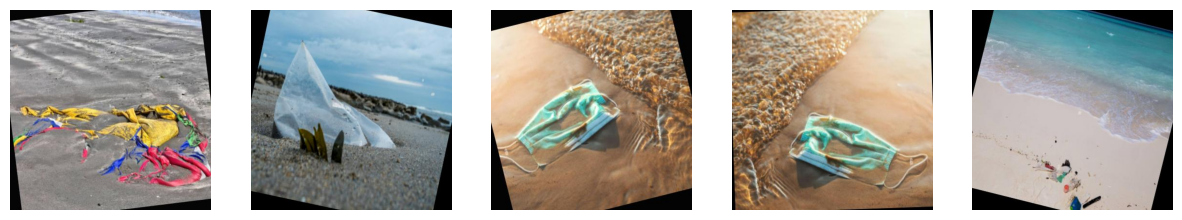

In [ ]:
# Annoted Dataset

# Define the folder containing the images
image_folder = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images'

all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

selected_images = random.sample(image_files, min(5, len(image_files)))

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [ ]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

# Paths for Aqua Trash dataset
aqua_images_folder = '/content/Aqua Trash/Images'
aqua_annotations_csv = '/content/Aqua Trash/annotations.csv'

# Combined dataset paths
target_train_images = '/content/Combined_Trash_Dataset/train/images'
target_train_labels = '/content/Combined_Trash_Dataset/train/labels'
target_val_images = '/content/Combined_Trash_Dataset/val/images'
target_val_labels = '/content/Combined_Trash_Dataset/val/labels'
target_data_yml = '/content/Combined_Trash_Dataset/data.yml'

# Create the target directories if they don't exist
os.makedirs(target_train_images, exist_ok=True)
os.makedirs(target_train_labels, exist_ok=True)
os.makedirs(target_val_images, exist_ok=True)
os.makedirs(target_val_labels, exist_ok=True)

# Load Aqua Trash annotations
df = pd.read_csv(aqua_annotations_csv)

# Update the class list to include all possible classes from the dataset
# Assuming these are the classes
class_list = ['plastic', 'metal', 'glass', 'paper', 'other']  # Add more classes as needed

# Function to convert bounding boxes to YOLO format
def convert_to_yolo_format(row, img_width, img_height):
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    x_center = (x_min + x_max) / 2.0 / img_width
    y_center = (y_min + y_max) / 2.0 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return x_center, y_center, width, height

# Move Aqua Trash images and create corresponding YOLO label files
for img_file in df['image_name'].unique():
    img_path = os.path.join(aqua_images_folder, img_file)

    # Check if the image file exists
    if not os.path.exists(img_path):
        print(f"Image file {img_file} not found, skipping...")
        continue  # Skip this iteration if the image file doesn't exist

    # Split into train/val based on custom strategy (80-20 split)
    if len(os.listdir(target_train_images)) / (len(os.listdir(target_train_images)) + len(os.listdir(target_val_images)) + 1) <= 0.8:
        target_image_folder = target_train_images
        target_label_folder = target_train_labels
    else:
        target_image_folder = target_val_images
        target_label_folder = target_val_labels

    # Move the image to the appropriate folder
    shutil.move(img_path, os.path.join(target_image_folder, img_file))

    # Load the image to get its dimensions
    img = plt.imread(os.path.join(target_image_folder, img_file))
    img_height, img_width = img.shape[:2]

    # Filter annotations for this image
    img_annotations = df[df['image_name'] == img_file]

    # Create label file in YOLO format
    label_file = os.path.join(target_label_folder, os.path.splitext(img_file)[0] + '.txt')
    with open(label_file, 'w') as f:
        for _, row in img_annotations.iterrows():
            x_center, y_center, width, height = convert_to_yolo_format(row, img_width, img_height)
            # Handle cases where the class is not in the predefined class_list
            if row['class_name'] not in class_list:
                print(f"Warning: Class '{row['class_name']}' not found in class list, skipping...")
                continue
            class_id = class_list.index(row['class_name'])  # Find the class ID based on the class list
            f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

print("Aqua Trash dataset integrated successfully!")

# Move Trash Data (previous dataset) to the combined dataset folders
source_train_images = '/content/Trash Data yolo/train/images'
source_train_labels = '/content/Trash Data yolo/train/labels'
source_val_images = '/content/Trash Data yolo/valid/images'
source_val_labels = '/content/Trash Data yolo/valid/labels'

def move_files(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)
        if os.path.exists(source_path):  # Check if the file exists before moving
            shutil.move(source_path, target_path)
        else:
            print(f"File {file_name} not found in {source_folder}, skipping...")

move_files(source_train_images, target_train_images)
move_files(source_train_labels, target_train_labels)
move_files(source_val_images, target_val_images)
move_files(source_val_labels, target_val_labels)

print("Trash Data dataset integrated successfully!")

# Combine class names from both datasets
# Trash Data classes (assuming these are the Trash Data classes based on previous yml)
trash_data_classes = ['cardboard_waste', 'glass_waste', 'metal_waste', 'plastic_waste', 'rubber_waste', 'styrofoam_waste', 'textile_waste', 'wood_waste']

# Combine both class sets and remove duplicates
combined_classes = list(set(trash_data_classes + class_list))

# Create combined data.yml
data_yml_content = f"""
train: {target_train_images}
val: {target_val_images}

nc: {len(combined_classes)}
names: {combined_classes}
"""

# Write combined data.yml file
with open(target_data_yml, 'w') as f:
    f.write(data_yml_content)

print(f"Combined data.yml created with {len(combined_classes)} classes!")


Aqua Trash dataset integrated successfully!
Trash Data dataset integrated successfully!
Combined data.yml created with 13 classes!


##Model Training
**Step 2 :** Model Building for classification of Trashes\
YOLO Model for Object Detection

In [ ]:
#YOLOV5
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 82), reused 100 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (11615/11615), done.
/content/yolov5/yolov5


In [ ]:
import torch

# Set the device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Train YOLOv5 model
!python /content/yolov5/yolov5/train.py --img 340 --batch 8 --epochs 16 --data /content/Combined_Trash_Dataset/data.yml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
      12/15     0.747G    0.02476    0.01404   0.009345         19        352:  94% 758/810 [01:43<00:08,  5.98it/s]/content/yolov5/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      12/15     0.747G    0.02477    0.01403   0.009355         11        352:  94% 759/810 [01:43<00:08,  6.10it/s]/content/yolov5/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      12/15     0.747G    0.02477    0.01403   0.009346         21        352:  94% 760/810 [01:44<00:08,  6.15it/s]/content/yolov5/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      12/1

In [ ]:
import os
import shutil

# Define paths
yolov5_runs_path = '/content/yolov5/yolov5/runs/train/exp'  # Path where YOLOv5 saves the training results
save_dir = '/content/drive/MyDrive/Mini_Project/Models/'  # Change to your desired path in Google Drive

# Create the destination directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Move the entire train directory to Google Drive
shutil.copy(yolov5_runs_path, os.path.join(save_dir, 'yolov5_training_results_new'))

print("YOLOv5 training results moved to Google Drive successfully!")

IsADirectoryError: [Errno 21] Is a directory: '/content/yolov5/yolov5/runs/train/exp'

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')  # Replace with your model path

# Define the list of images to run inference on
image_paths = [
    '/content/Combined_Trash_Dataset/train/images/000000_JPG.rf.d3371cb3d63a59c5ba6730368b7905af.jpg'  # Path to your test image
    # Add more images as needed
]

# Function to display images with bounding boxes
def display_images_with_boxes(images, predictions):
    for img, preds in zip(images, predictions):
        plt.figure(figsize=(10, 10))
        plt.imshow(img[..., ::-1])  # Convert BGR to RGB for display

        # Check if predictions are not empty
        if preds is not None:
            boxes = preds.xyxy[0].cpu().numpy()  # Move to CPU and convert to numpy
            for box in boxes:  # Access the predictions
                x1, y1, x2, y2, conf, cls = box  # Get bounding box coordinates
                plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2))
                plt.text(x1, y1, f'{model.names[int(cls)]} {conf:.2f}', fontsize=12, color='red')

        plt.axis('off')
        plt.show()

# Perform inference on the images
predictions = []
images = []
for image_path in image_paths:
    img = cv2.imread(image_path)  # Load the image
    images.append(img)  # Store the image for display
    preds = model(image_path)  # Run inference
    predictions.append(preds)  # Store predictions

# Display images with bounding boxes
display_images_with_boxes(images, predictions)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-5 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


#Yolo V8

In [ ]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import YOLO from the ultralytics library
from ultralytics import YOLO

# Define paths
dataset_config = '/content/Combined_Trash_Dataset/data.yml'  # Path to your dataset YAML file
model_save_path = '/content/drive/MyDrive/yolov8n.pt'  # Path where the trained model will be saved

# Load the YOLOv8 model (using the nano version for faster training, change to yolov8s, yolov8m, or yolov8l if needed)
model = YOLO("yolov8n.yaml")

# Train the model
model.train(data=dataset_config, epochs=8, batch=16, imgsz=640, save_dir='/content/runs/train/')

# Save the trained model to the specified path in Google Drive
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Combined_Trash_Dataset/data.yml, epochs=8, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 5.35M/5.35M [00:00<00:00, 231MB/s]


AMP: checks passed ✅


train: Scanning /content/Combined_Trash_Dataset/train/labels... 6474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6474/6474 [00:15<00:00, 412.15it/s]


train: New cache created: /content/Combined_Trash_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Combined_Trash_Dataset/val/labels... 331 images, 0 backgrounds, 0 corrupt: 100%|██████████| 331/331 [00:00<00:00, 408.52it/s]

val: New cache created: /content/Combined_Trash_Dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      2.35G      3.232      4.714      4.036         25        640: 100%|██████████| 405/405 [02:30<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.82it/s]

                   all        331        495      0.731     0.0247     0.0218    0.00882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8      2.33G      2.483      3.433      3.089         14        640: 100%|██████████| 405/405 [02:27<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.58it/s]


                   all        331        495      0.749     0.0553     0.0407     0.0185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      2.33G      1.976      2.773      2.523         35        640: 100%|██████████| 405/405 [02:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


                   all        331        495      0.928     0.0747      0.112     0.0571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      2.33G      1.723      2.398      2.252         30        640: 100%|██████████| 405/405 [02:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        331        495      0.798      0.104      0.108     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      2.31G      1.572      2.201      2.087         39        640: 100%|██████████| 405/405 [02:17<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.28it/s]

                   all        331        495      0.844      0.127       0.17     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      2.32G      1.469      2.032      1.988         22        640: 100%|██████████| 405/405 [02:19<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]


                   all        331        495      0.859       0.14       0.21      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      2.33G      1.415      1.951      1.926         37        640: 100%|██████████| 405/405 [02:20<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.18it/s]


                   all        331        495       0.88      0.158      0.234      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      2.32G      1.356      1.877      1.872         27        640: 100%|██████████| 405/405 [02:39<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]


                   all        331        495      0.881      0.165      0.224      0.158

8 epochs completed in 0.337 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 186 layers, 2,686,903 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]


                   all        331        495       0.88      0.157      0.233      0.156
            wood_waste         37         41          1          0     0.0282     0.0172
         textile_waste         26         33          1          0     0.0215       0.01
                 other          7          8          1          0          0          0
           metal_waste        251        364      0.718      0.678      0.689      0.482
          rubber_waste         27         28      0.442      0.425      0.402      0.265
                 paper         10         10          1          0      0.166      0.157
               plastic         11         11          1          0      0.323      0.164
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


TypeError: 'NoneType' object is not a mapping

In [ ]:
import os
import shutil

# Define paths
yolov5_runs_path = '/content/yolov5/runs/detect/train'  # Path where YOLOv5 saves the training results
save_dir = '/content/drive/MyDrive/Mini_Project/Models/yolov8_results'  # Change to your desired path in Google Drive

# Create the destination directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Move the entire train directory to Google Drive
shutil.move(yolov5_runs_path, os.path.join(save_dir, 'yolov8_training_results'))

print("YOLOv8 training results moved to Google Drive successfully!")

#Fine-Tune

In [ ]:

# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import YOLO from the ultralytics library
from ultralytics import YOLO# Import necessary libraries

# Load the YOLOv8 model (from the saved weights)
model = YOLO('/content/drive/MyDrive/Mini_Project/Models/yolov8_results/yolov5_training_results/weights/best.pt')

# Define the path to your dataset YAML file
dataset_config = '/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml'  # Adjust as needed

# Train the model
model.train(data=dataset_config, epochs=20, batch=16, imgsz=640, save_dir='/content/runs/train/')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 18.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Mini_Project/Models/yolov8_results/yolov5_training_results/weights/best.pt, data=/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]


Overriding model.yaml nc=13 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/Mini_Project/labelled alamy/train/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Mini_Project/labelled alamy/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.156      4.896      2.765          9        640: 100%|██████████| 4/4 [01:22<00:00, 20.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.18s/it]

                   all          5         14    0.00426       0.25      0.126     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G       2.15      4.826       2.89          8        640: 100%|██████████| 4/4 [00:42<00:00, 10.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all          5         14    0.00418       0.25      0.133      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.211      4.828      2.845         22        640: 100%|██████████| 4/4 [00:40<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          5         14    0.00367       0.25       0.13     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      2.005      4.666      2.635          8        640: 100%|██████████| 4/4 [00:40<00:00, 10.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all          5         14    0.00341       0.25     0.0658     0.0451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      2.139      4.598      2.674         19        640: 100%|██████████| 4/4 [00:43<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          5         14    0.00329       0.25     0.0666     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      2.004      4.603      2.629         15        640: 100%|██████████| 4/4 [00:42<00:00, 10.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          5         14    0.00303       0.25     0.0489      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G       2.21      4.619      2.759         17        640: 100%|██████████| 4/4 [00:44<00:00, 11.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all          5         14    0.00293       0.25     0.0373     0.0255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.116      4.601      2.675         15        640: 100%|██████████| 4/4 [00:57<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

                   all          5         14    0.00281       0.25     0.0473     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.907      4.524      2.598          9        640: 100%|██████████| 4/4 [00:54<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all          5         14    0.00274       0.25     0.0473      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.914      4.581      2.484         10        640: 100%|██████████| 4/4 [00:50<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all          5         14     0.0027       0.25     0.0471     0.0348


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      2.138      4.807      2.822          6        640: 100%|██████████| 4/4 [00:43<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all          5         14    0.00263       0.25     0.0484     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      2.001       4.65      2.608          7        640: 100%|██████████| 4/4 [00:41<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          5         14    0.00254       0.25     0.0481     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      2.013      4.755      2.613          7        640: 100%|██████████| 4/4 [00:44<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          5         14    0.00242       0.25     0.0449     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G       2.06      4.581      2.774          7        640: 100%|██████████| 4/4 [00:43<00:00, 10.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all          5         14     0.0107      0.286     0.0708     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.994      4.609      2.808          6        640: 100%|██████████| 4/4 [00:47<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all          5         14    0.00907      0.286     0.0702     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G       2.03      4.641      2.631         10        640: 100%|██████████| 4/4 [00:42<00:00, 10.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          5         14    0.00871      0.286     0.0699     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.871      4.533      2.609          6        640: 100%|██████████| 4/4 [00:41<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          5         14    0.00855      0.286     0.0707     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      2.055      4.524      2.588          9        640: 100%|██████████| 4/4 [00:48<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]

                   all          5         14    0.00809      0.286     0.0703     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.918      4.455      2.631          6        640: 100%|██████████| 4/4 [00:45<00:00, 11.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all          5         14    0.00886      0.286     0.0712     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.918      4.482      2.609          8        640: 100%|██████████| 4/4 [00:48<00:00, 12.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all          5         14    0.00872      0.286      0.133      0.105



20 epochs completed in 0.280 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 186 layers, 2,686,708 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


                   all          5         14    0.00872      0.286      0.132      0.105
                 Metal          2          3          0          0          0          0
               Plastic          3          7      0.025      0.143     0.0268     0.0208
        Plastic Bottle          2          2    0.00526        0.5    0.00703    0.00274
                Rubber          1          2    0.00461        0.5      0.496      0.397
Speed: 2.4ms preprocess, 217.1ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([4, 5, 6, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd0be06afb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
import shutil

# Define the source and destination paths
source = '/content/runs'
dest = '/content/drive/MyDrive/Mini_Project/Models/fine_tune_v8'

# Move the folder from source to destination
shutil.move(source, dest)

print(f'Moved folder from {source} to {dest}')


Moved folder from /content/runs to /content/drive/MyDrive/Mini_Project/Models/fine_tune_v8


In [ ]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import YOLO from the ultralytics library
from ultralytics import YOLO

# Define paths
dataset_config = '/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml'  # Path to your dataset YAML file
model_save_path = '/content/drive/MyDrive/yolov8n.pt'  # Path where the trained model will be saved

# Load the YOLOv8 model (using the nano version for faster training, change to yolov8s, yolov8m, or yolov8l if needed)
model = YOLO("yolov8n.yaml")

# Train the model
model.train(data=dataset_config, epochs=8, batch=16, imgsz=640, save_dir='/content/runs/train/')

# Save the trained model to the specified path in Google Drive
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/drive/MyDrive/Mini_Project/labelled alamy/train/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Mini_Project/labelled alamy/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8         0G      3.542      5.104      4.325          9        640: 100%|██████████| 4/4 [00:46<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all          5         14   0.000676      0.125    0.00208    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8         0G      3.215      4.974      4.257          8        640: 100%|██████████| 4/4 [00:45<00:00, 11.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all          5         14   0.000685      0.125    0.00168   0.000944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8         0G       3.35      5.053      4.311         22        640: 100%|██████████| 4/4 [00:45<00:00, 11.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all          5         14   0.000685      0.125    0.00161   0.000939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8         0G      3.411      5.065      4.251          8        640: 100%|██████████| 4/4 [00:41<00:00, 10.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all          5         14   0.000685      0.125    0.00178    0.00105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8         0G      3.522      4.942      4.273         19        640: 100%|██████████| 4/4 [00:42<00:00, 10.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          5         14   0.000667      0.125    0.00234    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8         0G      3.243      4.898      4.215         15        640: 100%|██████████| 4/4 [00:46<00:00, 11.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          5         14   0.000668      0.125     0.0027    0.00105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8         0G      3.341      5.028      4.257         17        640: 100%|██████████| 4/4 [00:42<00:00, 10.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all          5         14   0.000694      0.125    0.00185    0.00086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8         0G      3.331      5.017      4.313         15        640: 100%|██████████| 4/4 [00:44<00:00, 11.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all          5         14   0.000704      0.125    0.00165   0.000846



8 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 186 layers, 2,686,708 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                   all          5         14   0.000676      0.125    0.00251     0.0011
                 Metal          2          3          0          0          0          0
               Plastic          3          7          0          0          0          0
        Plastic Bottle          2          2          0          0          0          0
                Rubber          1          2     0.0027        0.5       0.01    0.00438
Speed: 2.5ms preprocess, 216.7ms inference, 0.0ms loss, 12.8ms postprocess per image
Results saved to runs/detect/train


TypeError: 'NoneType' object is not a mapping

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!make
!wget https://pjreddie.com/media/files/yolov3.weights
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load YOLOv3 model and weights
config_path = 'cfg/yolov3.cfg'  # Path to YOLOv3 configuration file
weights_path = 'yolov3.weights'  # Path to YOLOv3 weights file
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

# Define the path to your folder containing images
folder_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the names of the classes
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Iterate over each image file
for image_file in image_files:
    # Define the full image path
    image_path = os.path.join(folder_path, image_file)

    # Load the image
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Prepare the image for the model
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)

    # Perform detection
    detections = net.forward(output_layers)

    # Draw bounding boxes on the image
    for detection in detections:
        for obj in detection:
            scores = obj[5:]  # The scores for each class
            class_id = np.argmax(scores)  # Get the class with the highest score
            confidence = scores[class_id]  # Get the confidence score

            if confidence > 0.25:  # Adjust threshold as needed
                # Scale bounding box coordinates to the original image size
                center_x = int(obj[0] * width)
                center_y = int(obj[1] * height)
                w = int(obj[2] * width)
                h = int(obj[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Draw the bounding box
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(image, f'Class: {class_id}, Conf: {confidence:.2f}', (x, y - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Convert BGR image to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the image with predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.title(image_file)  # Show the filename as the title
    plt.show()


Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Total 15851 (delta 0), reused 0 (delta 0), pack-reused 15851 (from 1)
Receiving objects: 100% (15851/15851), 14.37 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (10683/10683), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
  253 |                 int

IndexError: invalid index to scalar variable.

In [ ]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import YOLO from the ultralytics library
from ultralytics import YOLO

# Define paths
dataset_config = '/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml'  # Path to your dataset YAML file
model_save_path = '/content/drive/MyDrive/yolo11n.pt'  # Path where the trained model will be saved

# Load the YOLOv8 model
model = YOLO("yolov8n.yaml")

# Train the model
model.train(data=dataset_config, epochs=8, batch=16, imgsz=640, save_dir='/content/')

# Save the trained model to the specified path in Google Drive
model.save(model_save_path)

print(f"Model saved to {model_save_path}")


Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /content/drive/MyDrive/Mini_Project/labelled alamy/train/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Mini_Project/labelled alamy/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8         0G      3.542      5.104      4.325          9        640: 100%|██████████| 4/4 [00:50<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          5         14   0.000676      0.125    0.00208    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8         0G      3.215      4.974      4.257          8        640: 100%|██████████| 4/4 [00:40<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

                   all          5         14   0.000685      0.125    0.00168   0.000944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8         0G       3.35      5.053      4.311         22        640: 100%|██████████| 4/4 [00:39<00:00,  9.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          5         14   0.000685      0.125    0.00161   0.000939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8         0G      3.411      5.065      4.251          8        640: 100%|██████████| 4/4 [00:40<00:00, 10.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          5         14   0.000685      0.125    0.00178    0.00105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8         0G      3.522      4.942      4.273         19        640: 100%|██████████| 4/4 [00:44<00:00, 11.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          5         14   0.000667      0.125    0.00234    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8         0G      3.243      4.898      4.215         15        640: 100%|██████████| 4/4 [00:41<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          5         14   0.000668      0.125     0.0027    0.00105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8         0G      3.341      5.028      4.257         17        640: 100%|██████████| 4/4 [00:42<00:00, 10.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          5         14   0.000694      0.125    0.00185    0.00086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8         0G      3.331      5.017      4.313         15        640: 100%|██████████| 4/4 [00:41<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          5         14   0.000704      0.125    0.00165   0.000846



8 epochs completed in 0.102 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 186 layers, 2,686,708 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


                   all          5         14   0.000676      0.125    0.00251     0.0011
                 Metal          2          3          0          0          0          0
               Plastic          3          7          0          0          0          0
        Plastic Bottle          2          2          0          0          0          0
                Rubber          1          2     0.0027        0.5       0.01    0.00438
Speed: 2.4ms preprocess, 196.7ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to runs/detect/train4


TypeError: 'NoneType' object is not a mapping

#Test Model

In [ ]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import the required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = '/content/drive/MyDrive/yolo11n.pt'  # Path to your saved model
model = YOLO(model_path)

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg'  # Path to your image

# Make predictions on the image
results = model.predict(source=image_path)

# Display the results
for result in results:
    # Draw bounding boxes on the image
    boxes = result.boxes  # Get the predicted boxes
    img = result.orig_img  # Get the original image

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.axis('off')  # Turn off axis
    plt.title("Predictions")
    plt.show()



image 1/1 /content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg: 640x640 1 toothbrush, 210.8ms
Speed: 4.9ms preprocess, 210.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Import the required libraries
import torch
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv5 model
model_path = '/content/drive/MyDrive/my_yolo_best.pt'  # Path to your saved model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg'  # Path to your image

# Make predictions on the image
results = model(image_path)

# Display the results
# Get the original image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img)  # Display the image
plt.axis('off')  # Turn off axis
plt.title("Original Image with Predictions")

# Draw bounding boxes on the image
for box in results.xyxy[0]:  # results.xyxy[0] contains the bounding boxes
    x1, y1, x2, y2, conf, cls = box
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw the box
    plt.text(int(x1), int(y1), f'{model.names[int(cls)]} {conf:.2f}', color='white', fontsize=12, backgroundcolor='blue')  # Label

plt.imshow(img)  # Show the image with predictions
plt.axis('off')  # Turn off axis
plt.title("Predictions")
plt.show()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-5 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


#Dense Pose

In [ ]:
# Install required dependencies
!pip install opencv-python torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install git+https://github.com/facebookresearch/detectron2.git
!pip install git+https://github.com/facebookresearch/DensePose.git
!pip install mediapipe opencv-python

# Import necessary libraries
import torch
import cv2
import matplotlib.pyplot as plt
from densepose import DensePosePredictor, DensePoseDataManager


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-s2yhq3nz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-s2yhq3nz
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/DensePose.git to /tmp/pip-req-build-jppyci1_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/DensePose.git /tmp/pip-req-build-jppyci1_
  Resolved https://github.com/facebookresearch/DensePose.git to commit 51fb9f110a454c77b0c5acfa0c7cceb317f38aa1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.4 MB/s eta 0:00:00

ModuleNotFoundError: No module named 'densepose'

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg'  # Path to your image

# Read the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and make predictions
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

# Draw the pose annotation on the image
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("MediaPipe Pose Estimation")
plt.show()
